In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score


In [3]:
df = pd.read_csv(r'C:\Users\BlackFlameSG\Documents\Python Scripts\ML\Project\SVM_Numerical\HR_comma_sep.csv')

In [4]:
print(df.columns)
df.info()

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memo

In [5]:
df = df.sample(frac=1, random_state=0).reset_index(drop=True)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.44,0.57,2,141,3,0,1,0,product_mng,medium
1,0.55,0.96,3,194,3,0,0,0,product_mng,medium
2,0.72,0.67,5,210,2,0,0,0,management,medium
3,0.96,0.75,4,177,2,0,0,0,IT,low
4,0.96,0.54,3,198,3,0,0,0,support,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.52,0.57,3,270,3,0,0,0,RandD,low
14995,0.59,0.79,4,209,2,0,0,0,technical,medium
14996,0.69,0.94,5,259,2,0,0,0,IT,medium
14997,0.78,0.59,5,236,3,0,0,0,technical,high


In [6]:
print(df['salary'].unique())
print(df['Department'].unique())

['medium' 'low' 'high']
['product_mng' 'management' 'IT' 'support' 'marketing' 'technical' 'sales'
 'accounting' 'RandD' 'hr']


In [7]:
df = df.replace({'salary' :{'low':0,'medium':1,'high':2}})

In [8]:
print(df['salary'].unique())

[1 0 2]


In [9]:
df = pd.get_dummies(df, drop_first=False)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.44,0.57,2,141,3,0,1,0,1,0,0,0,0,0,0,1,0,0,0
1,0.55,0.96,3,194,3,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,0.72,0.67,5,210,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0.96,0.75,4,177,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0.96,0.54,3,198,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.52,0.57,3,270,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0
14995,0.59,0.79,4,209,2,0,0,0,1,0,0,0,0,0,0,0,0,0,1
14996,0.69,0.94,5,259,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0
14997,0.78,0.59,5,236,3,0,0,0,2,0,0,0,0,0,0,0,0,0,1


In [10]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical'],
      dtype='object')

In [11]:
df = df.drop('Department_RandD', axis = 1)

In [18]:
cols = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'Department_IT',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical', 'left']

In [19]:
corrM = df.corr()
corrM

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_IT,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022,0.006373,-0.028649,-0.012841,0.007172,0.005715,0.006919,0.004007,0.009185,-0.009345
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002,0.001269,0.002193,-0.009645,0.009662,-0.000311,-0.001989,-0.023031,0.017104,0.013742
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803,0.003287,0.004189,-0.027356,0.009728,-0.023064,0.000829,-0.013388,0.000303,0.028596
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242,0.006967,0.000524,-0.010783,0.000834,-0.008210,-0.005494,-0.001718,-0.002444,0.013638
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715,-0.006053,0.003909,-0.022194,0.115436,0.012096,-0.003919,0.015150,-0.030111,-0.027991
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247,-0.009293,-0.012836,-0.015649,0.011242,0.011367,0.001246,-0.004955,0.012079,-0.006070
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898,-0.010925,0.015201,0.028249,-0.046035,-0.000859,-0.011029,0.009923,0.010700,0.020076
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119,-0.038942,-0.004852,-0.001531,0.128087,0.049253,-0.037288,0.012353,-0.035605,-0.035799
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000,-0.010959,0.012759,0.004599,0.156665,0.011599,-0.007669,-0.035599,-0.029888,-0.018630
Department_IT,0.006373,0.001269,0.003287,0.006967,-0.006053,-0.009293,-0.010925,-0.038942,-0.010959,1.000000,-0.069293,-0.067949,-0.062500,-0.073524,-0.075503,-0.184302,-0.124705,-0.140484


<AxesSubplot:>

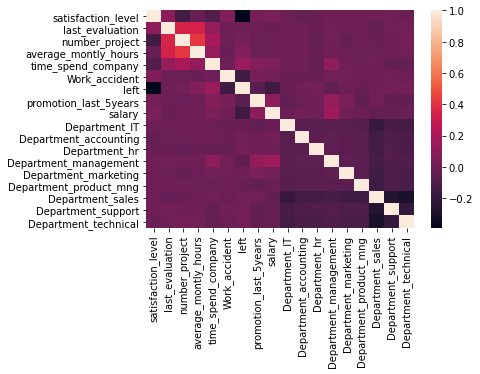

In [20]:
sns.heatmap(corrM, annot=False)

In [21]:
df = df[cols]
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Department_IT,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,left
0,0.44,0.57,2,141,3,0,0,1,0,0,0,0,0,1,0,0,0,1
1,0.55,0.96,3,194,3,0,0,1,0,0,0,0,0,1,0,0,0,0
2,0.72,0.67,5,210,2,0,0,1,0,0,0,1,0,0,0,0,0,0
3,0.96,0.75,4,177,2,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0.96,0.54,3,198,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [22]:
print(df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'Department_IT',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical', 'left']].skew())

satisfaction_level       -0.476360
last_evaluation          -0.026622
number_project            0.337706
average_montly_hours      0.052842
time_spend_company        1.853319
Work_accident             2.021149
promotion_last_5years     6.636968
salary                    0.598882
Department_IT             3.052062
Department_accounting     4.075859
Department_hr             4.165530
Department_management     4.566832
Department_marketing      3.813782
Department_product_mng    3.700720
Department_sales          1.002197
Department_support        1.975945
Department_technical      1.654207
left                      1.230043
dtype: float64


In [23]:
print(df['time_spend_company'].describe())

count    14999.000000
mean         3.498233
std          1.460136
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: time_spend_company, dtype: float64


<AxesSubplot:>

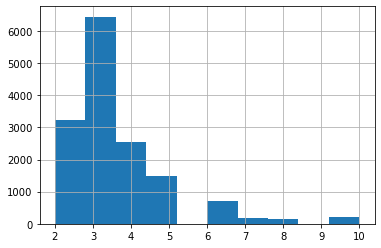

In [24]:
df.time_spend_company.hist()

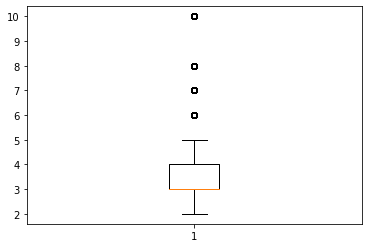

In [25]:
plt.boxplot(df["time_spend_company"])
plt.show()

In [26]:
print(df['Work_accident'].describe())

count    14999.000000
mean         0.144610
std          0.351719
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Work_accident, dtype: float64


<AxesSubplot:>

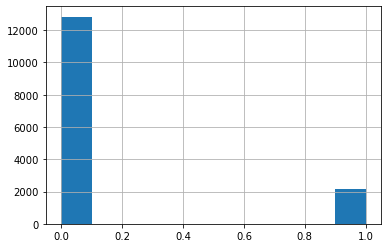

In [27]:
df.Work_accident.hist()

<AxesSubplot:>

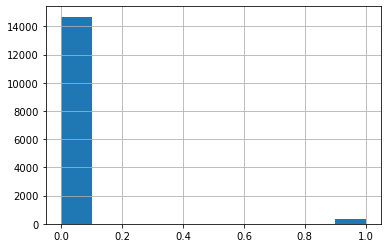

In [28]:
df.promotion_last_5years.hist()

In [29]:
print(df['promotion_last_5years'].describe())

count    14999.000000
mean         0.021268
std          0.144281
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: promotion_last_5years, dtype: float64


In [30]:
def outlier(feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    Min=Q1-1.5*IQR
    Max=Q3+1.5*IQR
    Floor=df[feature].quantile(0.10)
    Cap=df[feature].quantile(0.90)
    df[feature]=np.where(df[feature] < Min,Floor,df[feature])
    df[feature]=np.where(df[feature] > Max,Cap,df[feature])

In [31]:
outlier('time_spend_company')

<AxesSubplot:>

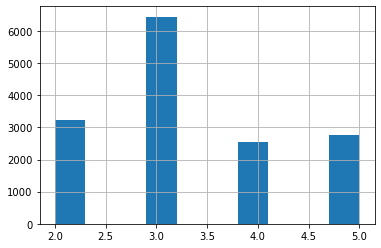

In [32]:
df.time_spend_company.hist()

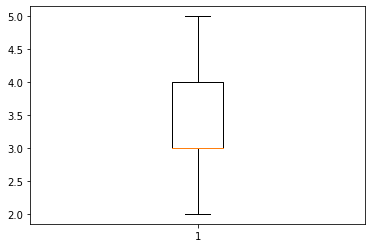

In [33]:
plt.boxplot(df["time_spend_company"])
plt.show()

In [34]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'Department_IT',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical', 'left'],
      dtype='object')

In [35]:
feature= df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'salary',
       'Department_IT', 'Department_accounting', 'Department_hr',
       'promotion_last_5years', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical']]
X=np.asarray(feature)
y=np.asarray(df['left'])

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=27)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(11999, 17)
(11999,)
(3000, 17)
(3000,)


In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf', random_state=128, C = 1000)
clf.fit(X_train, y_train)

SVC(C=1000, random_state=128)

In [39]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [40]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, average="macro"))

Accuracy: 0.9713333333333334
Precision: 0.9592704702217607


In [41]:
# Model Recall: what percentage of positive tuples are labelled as such?
recall_average = recall_score(y_test,y_pred, average="micro")
print("Recall:",recall_average)

Recall: 0.9713333333333334


In [42]:
#confusion matrix
import pandas as pd
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(conf_matrix, index=['stayed', 'left'], columns=['stayed', 'left'])

<AxesSubplot:>

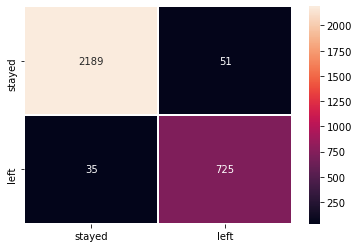

In [43]:
sns.heatmap(conf_matrix, annot=True, linewidths=1, fmt='g')

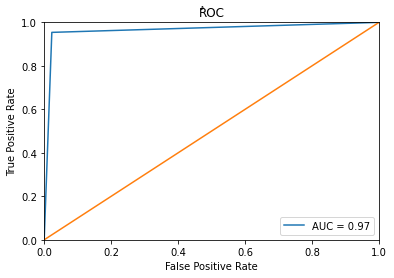

In [45]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred) #fpr = False Positive Rate, tpr = True Positive Rate
roc_auc = metrics.auc(fpr, tpr)

plt.title('ُROC')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()